In [1]:
import os 
import pandas as pd
import re
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
#Pulling CSV
label_list = []     
subject= subject_ids
subjects_dir=data_dir
subject_folder=subject

subject_path = os.path.join(subjects_dir, subject_folder)
if not os.path.isdir(subject_path):
    print(f"{subject_folder} is not a valid directory.")

print(f"\nProcessing subject folder: {subject_folder}")

# Find relevant CSV files in the folder based on the pattern
csv_files = [
    f for f in os.listdir(subject_path)
    if re.match(rf"{subject_folder}-\w{{9}}-\d{{8}}-\d{{8}}_omx_mapped_mapped\.csv", f)
]
csv_files=csv_files[0]
# Check if any CSV files were found
if not csv_files:
    print(f"No relevant CSV files found in {subject_folder}.")

print(f"Found {len(csv_files)} relevant CSV file(s): {csv_files}")

print("cat",csv_files)
file_path = os.path.join(subject_path, csv_files)
print(f"Processing file: {csv_files}")

## ILUZ Mobilise

In [4]:
#Sparse predictions
results_path = '/results_mobilise_iluz/'
subject_ids="XXXX"
pd.read_csv(results_path + subject + '/gs_list.csv',nrows=7)

,start,end
0,8591590,8592285
1,15480986,15481542
2,17376529,17377085
3,33821202,33822036
4,33825650,33826345
5,34395550,34396384
6,41564892,41565448


In [ ]:
#iluz spikes examined, least sparse predictions
3   33821202  33822036
4   33825650  33826345
5   34395550  34396384

In [4]:
pred_idx_df = pd.read_csv(results_path + subject + '/gs_list.csv', skiprows=range(1, 4),nrows=3)
start_time= pred_idx_df.iloc[0,0]

subject_data = []

df = pd.read_csv(file_path, skiprows=range(1, pred_idx_df.iloc[0,0]-2), 
    nrows=800000  
)

subject_data.append(df)        
    
all_data = pd.concat(subject_data, ignore_index=True)
print("buggy",all_data.head())
label_list = all_data['mapped_value'].values

label_series = pd.Series(label_list)
print("Outputting label distribution...")
print(label_series.value_counts())
activity_mapping = {
    'not_worn':0,
    'lying':0,
    'standing':0,        
    'sitting':0,
    'walking':1,
    'running':1,
    'shuffling':1,
    'stair_walking':1
}

truth_list = label_series.map(activity_mapping).fillna(0).astype(int).tolist()
all_data['actual']=truth_list
print("tryth",len(truth_list))

all_data['index_true']=range(pred_idx_df.iloc[0,0]-2,pred_idx_df.iloc[0,0]-2+800000)

values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,all_data[all_data['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
all_data['predicted']=[1 if x in values else 0 for x in all_data.index_true]

buggy                  timestamp  Accel-X (g)   Accel-Y (g)   Accel-Z (g)  \
0  2021-01-22 07:56:51.990     0.954159     -0.148391     -0.265032   
1  2021-01-22 07:56:52.000     0.951207     -0.144479     -0.260120   
2  2021-01-22 07:56:52.009     0.951207     -0.148391     -0.264049   
3  2021-01-22 07:56:52.020     0.951207     -0.143501     -0.258155   
4  2021-01-22 07:56:52.029     0.956127     -0.142524     -0.263067   

    Gyro-X (d/s)   Gyro-Y (d/s)   Gyro-Z (d/s)  Mag-X  Mag-Y  Mag-Z  \
0           0.35          -1.54           0.00   68.0  -45.3  -41.9   
1          -0.14          -1.26           0.28   68.0  -45.3  -41.9   
2          -0.14          -1.68           0.14   68.0  -45.3  -41.9   
3           0.35          -1.54           0.49   68.0  -45.3  -41.9   
4           0.35          -0.84           0.98   68.0  -45.3  -41.9   

  mapped_value  
0        lying  
1        lying  
2        lying  
3        lying  
4        lying  
Outputting label distribution...
sitti

## Window Duration

In [6]:
window_time=datetime.strptime(all_data.timestamp[0], "%Y-%m-%d %H:%M:%S.%f")-datetime.strptime(all_data.timestamp[len(all_data)-1], "%Y-%m-%d %H:%M:%S.%f")
window_time = window_time.total_seconds()

# Convert to hours, minutes, and seconds
hours = int(window_time // 3600)
minutes = int((window_time % 3600) // 60)
seconds = int(window_time % 60)

print(f"{hours} hours, {minutes} minutes, {seconds} seconds")

-3 hours, 46 minutes, 40 seconds


In [5]:
all_data

,timestamp,Accel-X (g),Accel-Y (g),Accel-Z (g),Gyro-X (d/s),Gyro-Y (d/s),Gyro-Z (d/s),Mag-X,Mag-Y,Mag-Z,mapped_value,actual
0,2021-01-22 07:56:51.990,0.954159,-0.148391,-0.265032,0.35,-1.54,0.00,68.0,-45.3,-41.9,lying,0
1,2021-01-22 07:56:52.000,0.951207,-0.144479,-0.260120,-0.14,-1.26,0.28,68.0,-45.3,-41.9,lying,0
2,2021-01-22 07:56:52.009,0.951207,-0.148391,-0.264049,-0.14,-1.68,0.14,68.0,-45.3,-41.9,lying,0
3,2021-01-22 07:56:52.020,0.951207,-0.143501,-0.258155,0.35,-1.54,0.49,68.0,-45.3,-41.9,lying,0
4,2021-01-22 07:56:52.029,0.956127,-0.142524,-0.263067,0.35,-0.84,0.98,68.0,-45.3,-41.9,lying,0
...,...,...,...,...,...,...,...,...,...,...,...,...
799995,2021-01-22 10:10:11.940,-0.024686,-0.890350,-0.399871,0.70,-2.66,0.42,-21.1,88.3,-77.8,NaN,0
799996,2021-01-22 10:10:11.949,-0.022718,-0.903062,-0.398888,0.91,-2.66,0.14,-21.1,88.3,-77.8,NaN,0
799997,2021-01-22 10:10:11.960,-0.025670,-0.912840,-0.392012,1.33,-1.89,0.07,-21.1,88.3,-77.8,NaN,0
799998,2021-01-22 10:10:11.970,-0.025670,-0.928486,-0.391030,2.73,-0.07,-0.77,-21.1,88.3,-77.8,NaN,0


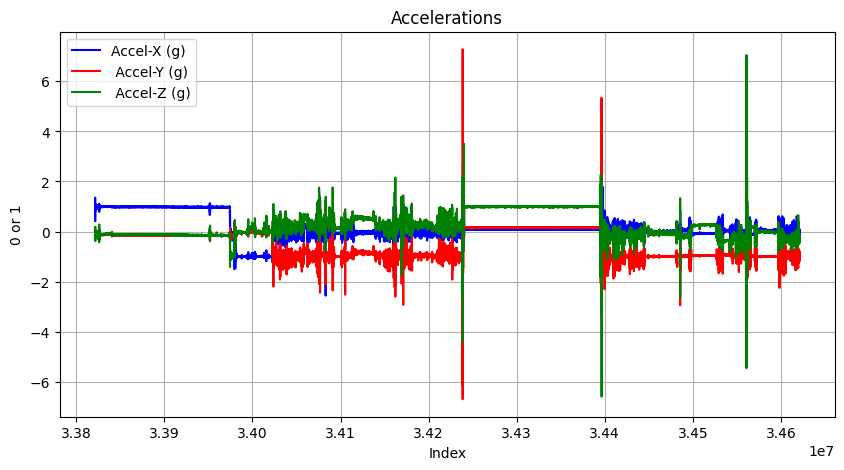

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(all_data['index_true'], all_data[all_data.columns[1]], label=all_data.columns[1], color='blue')
plt.plot(all_data['index_true'], all_data[all_data.columns[2]], label=all_data.columns[2], color='red')
plt.plot(all_data['index_true'], all_data[all_data.columns[3]], label=all_data.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

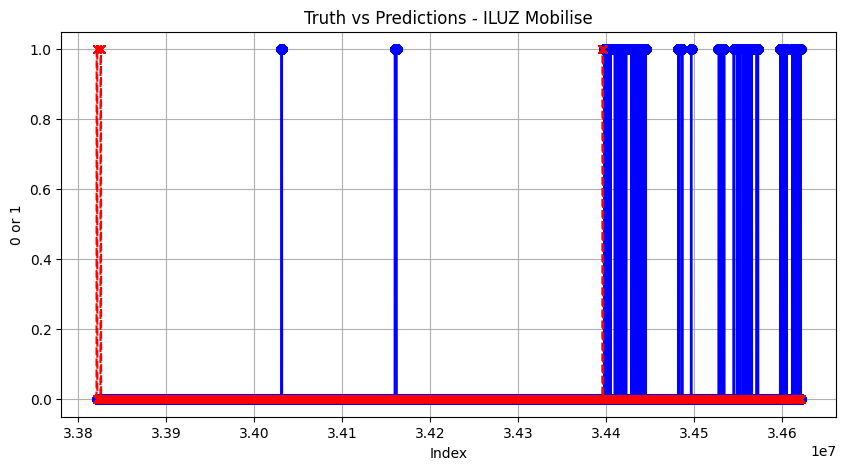

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(all_data['index_true'], all_data['actual'], label='Truth', color='blue', marker='o', linestyle='-', markersize=6)
plt.plot(all_data['index_true'], all_data['predicted'], label='Predictions', color='red', marker='x', linestyle='--', markersize=6)
plt.title('Truth vs Predictions - ILUZ Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)

plt.show()

### Troubleshooting ILUZ

In [9]:
# Positive instances
all_data[all_data['actual'] == 1]

,timestamp,Accel-X (g),Accel-Y (g),Accel-Z (g),Gyro-X (d/s),Gyro-Y (d/s),Gyro-Z (d/s),Mag-X,Mag-Y,Mag-Z,mapped_value,actual,index_true,predicted
209603,2021-01-22 08:31:48.020,0.002565,-0.854450,0.169282,1.61,25.97,-6.30,7.3,77.0,-57.8,stair_walking,1,34030803,0
209604,2021-01-22 08:31:48.029,-0.006290,-0.861295,0.162406,3.29,26.74,-6.23,7.3,77.0,-57.8,stair_walking,1,34030804,0
209605,2021-01-22 08:31:48.040,-0.011210,-0.874985,0.153565,3.78,27.30,-5.60,7.3,77.0,-57.8,stair_walking,1,34030805,0
209606,2021-01-22 08:31:48.049,-0.008258,-0.878896,0.149636,4.20,27.44,-4.83,7.3,77.0,-57.8,stair_walking,1,34030806,0
209607,2021-01-22 08:31:48.060,-0.006290,-0.880852,0.143742,4.41,27.37,-3.43,7.3,77.0,-57.8,stair_walking,1,34030807,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799908,2021-01-22 10:10:11.069,0.072723,-0.925552,-0.331108,-20.93,2.59,-7.98,-25.8,90.2,-77.9,shuffling,1,34621108,0
799909,2021-01-22 10:10:11.079,0.071739,-0.916752,-0.333073,-20.23,1.82,-7.35,-25.8,90.2,-77.9,shuffling,1,34621109,0
799910,2021-01-22 10:10:11.090,0.064851,-0.916752,-0.343878,-19.67,1.05,-6.02,-25.8,90.2,-77.9,shuffling,1,34621110,0
799911,2021-01-22 10:10:11.100,0.071739,-0.920663,-0.353701,-19.18,0.28,-4.97,-25.8,90.2,-77.9,shuffling,1,34621111,0


In [10]:
#Sample's class imbalance
len(all_data[all_data['actual'] == 1])/800000

0.04592125

#### Explore Nans

In [11]:
all_data[pd.isna(all_data['mapped_value'])]

,timestamp,Accel-X (g),Accel-Y (g),Accel-Z (g),Gyro-X (d/s),Gyro-Y (d/s),Gyro-Z (d/s),Mag-X,Mag-Y,Mag-Z,mapped_value,actual,index_true,predicted
202002,2021-01-22 08:30:32.009,-0.220786,-0.933656,-0.231505,3.08,-4.48,0.63,10.2,99.9,-84.5,NaN,0,34023202,0
202003,2021-01-22 08:30:32.020,-0.224722,-0.942456,-0.234452,3.22,-4.62,1.05,9.9,99.8,-83.1,NaN,0,34023203,0
202004,2021-01-22 08:30:32.029,-0.229642,-0.947345,-0.234452,3.15,-4.55,1.12,9.9,99.8,-83.1,NaN,0,34023204,0
202005,2021-01-22 08:30:32.040,-0.235545,-0.953212,-0.226593,3.57,-4.48,0.98,9.9,99.8,-83.1,NaN,0,34023205,0
202006,2021-01-22 08:30:32.049,-0.243417,-0.953212,-0.238381,4.83,-5.18,0.84,9.9,99.8,-83.1,NaN,0,34023206,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,2021-01-22 10:10:11.940,-0.024686,-0.890350,-0.399871,0.70,-2.66,0.42,-21.1,88.3,-77.8,NaN,0,34621195,0
799996,2021-01-22 10:10:11.949,-0.022718,-0.903062,-0.398888,0.91,-2.66,0.14,-21.1,88.3,-77.8,NaN,0,34621196,0
799997,2021-01-22 10:10:11.960,-0.025670,-0.912840,-0.392012,1.33,-1.89,0.07,-21.1,88.3,-77.8,NaN,0,34621197,0
799998,2021-01-22 10:10:11.970,-0.025670,-0.928486,-0.391030,2.73,-0.07,-0.77,-21.1,88.3,-77.8,NaN,0,34621198,0


In [14]:
# Unique obs per class
print(pd.unique(all_data[pd.isna(all_data['mapped_value'])].actual),pd.unique(all_data[pd.isna(all_data['mapped_value'])].predicted))

[0] [0]


In [6]:
del subject_data, df

#### Try fill NA= 1

In [31]:
#del subject_data, df 
subject_data = []

df = pd.read_csv(file_path, skiprows=range(1, 33821200), 
    nrows=800000  
)

subject_data.append(df)        
    
all_data2 = pd.concat(subject_data, ignore_index=True)
print("buggy",all_data2.head())
label_list = all_data2['mapped_value'].values

label_series = pd.Series(label_list)
print("Outputting label distribution...")
print(label_series.value_counts())
activity_mapping = {
    'not_worn':0,
    'lying':0,
    'standing':0,        
    'sitting':0,
    'walking':1,
    'running':1,
    'shuffling':1,
    'stair_walking':1
}

truth_list = label_series.map(activity_mapping).fillna(1).astype(int).tolist()
all_data2['actual']=truth_list
print("tryth",len(truth_list))

buggy                  timestamp  Accel-X (g)   Accel-Y (g)   Accel-Z (g)  \
0  2021-01-22 07:56:51.990     0.954159     -0.148391     -0.265032   
1  2021-01-22 07:56:52.000     0.951207     -0.144479     -0.260120   
2  2021-01-22 07:56:52.009     0.951207     -0.148391     -0.264049   
3  2021-01-22 07:56:52.020     0.951207     -0.143501     -0.258155   
4  2021-01-22 07:56:52.029     0.956127     -0.142524     -0.263067   

    Gyro-X (d/s)   Gyro-Y (d/s)   Gyro-Z (d/s)  Mag-X  Mag-Y  Mag-Z  \
0           0.35          -1.54           0.00   68.0  -45.3  -41.9   
1          -0.14          -1.26           0.28   68.0  -45.3  -41.9   
2          -0.14          -1.68           0.14   68.0  -45.3  -41.9   
3           0.35          -1.54           0.49   68.0  -45.3  -41.9   
4           0.35          -0.84           0.98   68.0  -45.3  -41.9   

  mapped_value  
0        lying  
1        lying  
2        lying  
3        lying  
4        lying  
Outputting label distribution...
sitti

In [33]:
all_data2['index_true']=range(pred_idx_df.iloc[0,0]-2,pred_idx_df.iloc[0,0]-2+800000)
values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,all_data2[all_data2['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
all_data2['predicted']=[1 if x in values else 0 for x in all_data2.index_true]

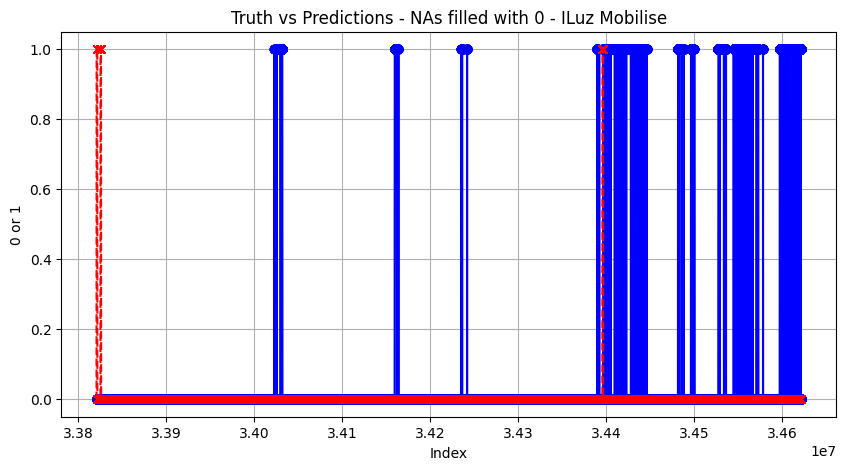

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(all_data2['index_true'], all_data2['actual'], label='Truth', color='blue', marker='o', linestyle='-', markersize=6)
plt.plot(all_data2['index_true'], all_data2['predicted'], label='Predictions', color='red', marker='x', linestyle='--', markersize=6)
plt.title('Truth vs Predictions - NAs filled with 0 - ILuz Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

Not looking much better

In [22]:
del df, subject_data,all_data, all_data2

## IONESCU Mobilise

In [5]:
#Pulling Predictions mobilise_ionescu
results_path = '/results_mobilise_ionescu/'

pred_idx_df = pd.read_csv(results_path + subject + '/gs_list.csv', skiprows=range(1, 4),nrows=70)
start_time= pred_idx_df.iloc[0,0]

subject_data = []

df = pd.read_csv(file_path, skiprows=range(1, pred_idx_df.iloc[0,0]-2), 
    nrows=800000  
)

subject_data.append(df)        
    
all_data = pd.concat(subject_data, ignore_index=True)
print("buggy",all_data.head())
label_list = all_data['mapped_value'].values

label_series = pd.Series(label_list)
print("Outputting label distribution...")
print(label_series.value_counts())
activity_mapping = {
    'not_worn':0,
    'lying':0,
    'standing':0,        
    'sitting':0,
    'walking':1,
    'running':1,
    'shuffling':1,
    'stair_walking':1
}

truth_list = label_series.map(activity_mapping).fillna(0).astype(int).tolist()
all_data['actual']=truth_list
print("tryth",len(truth_list))


all_data['index_true']=range(pred_idx_df.iloc[0,0]-2,pred_idx_df.iloc[0,0]-2+800000)

values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,all_data[all_data['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
all_data['predicted']=[1 if x in values else 0 for x in all_data.index_true]

buggy                  timestamp  Accel-X (g)   Accel-Y (g)   Accel-Z (g)  \
0  2021-01-18 14:34:25.489     0.345894     -0.533588      0.768450   
1  2021-01-18 14:34:25.500     0.345894     -0.533588      0.770414   
2  2021-01-18 14:34:25.510     0.349830     -0.538477      0.772379   
3  2021-01-18 14:34:25.520     0.346878     -0.531632      0.769432   
4  2021-01-18 14:34:25.530     0.344910     -0.534566      0.765503   

    Gyro-X (d/s)   Gyro-Y (d/s)   Gyro-Z (d/s)  Mag-X  Mag-Y  Mag-Z  \
0          -0.21           0.00          -0.28  -17.8   82.1  -42.4   
1          -0.14           0.07          -0.28  -17.8   82.1  -42.4   
2           0.07          -0.14          -0.14  -17.8   82.1  -42.4   
3           0.00          -0.07          -0.35  -17.7   81.9  -43.1   
4          -0.07           0.07          -0.07  -17.7   81.9  -43.1   

  mapped_value  
0        lying  
1        lying  
2        lying  
3        lying  
4        lying  
Outputting label distribution...
lying

KeyboardInterrupt: 

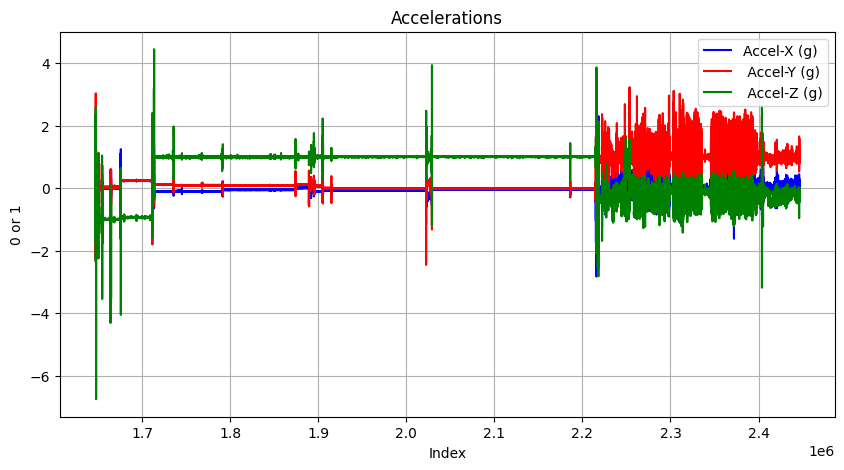

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(all_data['index_true'], all_data[all_data.columns[1]], label=all_data.columns[1], color='blue')
plt.plot(all_data['index_true'], all_data[all_data.columns[2]], label=all_data.columns[2], color='red')
plt.plot(all_data['index_true'], all_data[all_data.columns[3]], label=all_data.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

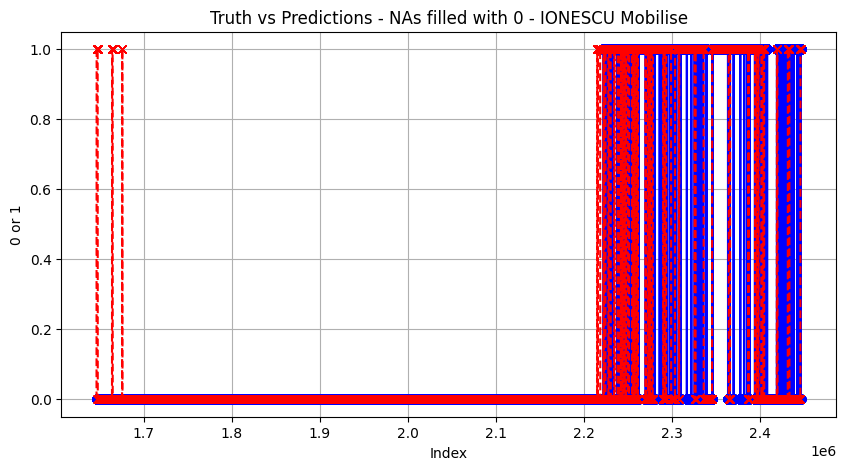

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(all_data['index_true'], all_data['actual'], label='Truth', color='blue', marker='o', linestyle='-', markersize=6)
plt.plot(all_data['index_true'], all_data['predicted'], label='Predictions', color='red', marker='x', linestyle='--', markersize=6)
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

### Tracking ILUZ at this same time period (1.7 -2.5 vs 3.3-3.5 above)

In [42]:
#sparse predictions
pd.read_csv(results_path + subject + '/gs_list.csv', nrows=7)

,start,end
0,696947,699857
1,1614305,1615170
2,1619050,1620505
3,1646552,1647872
4,1664127,1664820
5,1675565,1675925
6,2215012,2215382


In [48]:
results_path = '/results_mobilise_iluz/'
pred_idx_df = pd.read_csv(results_path + subject + '/gs_list.csv', skiprows=1, nrows=2)

all_data['index_true']=range(start_time-2,start_time-2+800000)

values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,all_data[all_data['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
all_data['predicted']=[1 if x in values else 0 for x in all_data.index_true]

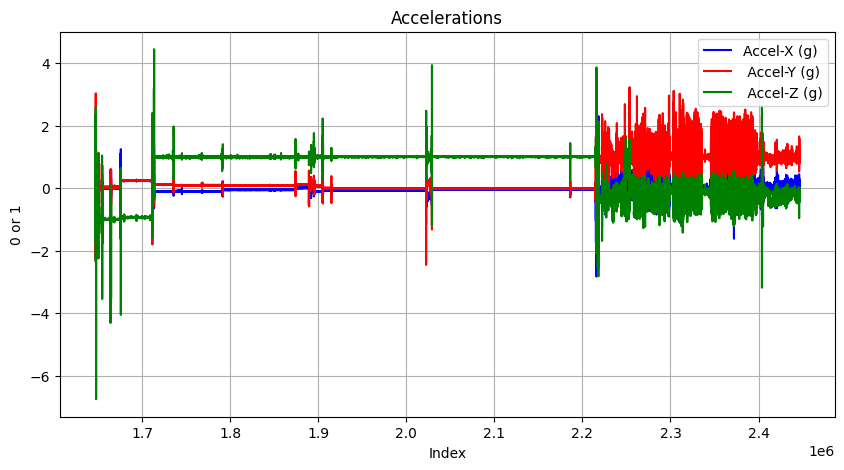

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(all_data['index_true'], all_data[all_data.columns[1]], label=all_data.columns[1], color='blue')
plt.plot(all_data['index_true'], all_data[all_data.columns[2]], label=all_data.columns[2], color='red')
plt.plot(all_data['index_true'], all_data[all_data.columns[3]], label=all_data.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

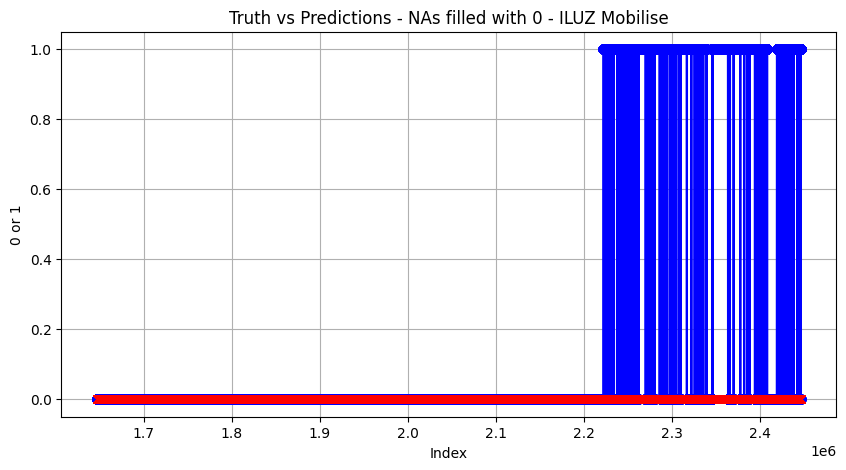

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(all_data['index_true'], all_data['actual'], label='Truth', color='blue', marker='o', linestyle='-', markersize=6)
plt.plot(all_data['index_true'], all_data['predicted'], label='Predictions', color='red', marker='x', linestyle='--', markersize=6)
plt.title('Truth vs Predictions - NAs filled with 0 - ILUZ Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

## Narrow Time Windows

In [4]:
#Pulling Predictions mobilise_ionescu
results_path = '/results_mobilise_ionescu/'

pred_idx_df = pd.read_csv(results_path + subject + '/gs_list.csv', skiprows=range(1, 4),nrows=70)
start_time= pred_idx_df.iloc[0,0]

subject_data = []

df = pd.read_csv(file_path, skiprows=range(1, pred_idx_df.iloc[0,0]-2), 
    nrows=800000  
)

subject_data.append(df)        
    
all_data = pd.concat(subject_data, ignore_index=True)
print("buggy",all_data.head())
label_list = all_data['mapped_value'].values

label_series = pd.Series(label_list)
print("Outputting label distribution...")
print(label_series.value_counts())
activity_mapping = {
    'not_worn':0,
    'lying':0,
    'standing':0,        
    'sitting':0,
    'walking':1,
    'running':1,
    'shuffling':1,
    'stair_walking':1
}

truth_list = label_series.map(activity_mapping).fillna(0).astype(int).tolist()
all_data['actual']=truth_list
print("tryth",len(truth_list))

all_data['index_true']=range(pred_idx_df.iloc[0,0]-2,pred_idx_df.iloc[0,0]-2+800000)

values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,all_data[all_data['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
all_data['predicted']=[1 if x in values else 0 for x in all_data.index_true]

buggy                  timestamp  Accel-X (g)   Accel-Y (g)   Accel-Z (g)  \
0  2021-01-18 14:34:25.489     0.345894     -0.533588      0.768450   
1  2021-01-18 14:34:25.500     0.345894     -0.533588      0.770414   
2  2021-01-18 14:34:25.510     0.349830     -0.538477      0.772379   
3  2021-01-18 14:34:25.520     0.346878     -0.531632      0.769432   
4  2021-01-18 14:34:25.530     0.344910     -0.534566      0.765503   

    Gyro-X (d/s)   Gyro-Y (d/s)   Gyro-Z (d/s)  Mag-X  Mag-Y  Mag-Z  \
0          -0.21           0.00          -0.28  -17.8   82.1  -42.4   
1          -0.14           0.07          -0.28  -17.8   82.1  -42.4   
2           0.07          -0.14          -0.14  -17.8   82.1  -42.4   
3           0.00          -0.07          -0.35  -17.7   81.9  -43.1   
4          -0.07           0.07          -0.07  -17.7   81.9  -43.1   

  mapped_value  
0        lying  
1        lying  
2        lying  
3        lying  
4        lying  
Outputting label distribution...
lying

#### Range 2.2-2.3

In [121]:
first=all_data[all_data['index_true'].between(2200000, 2300000)]
first["is_na"] = first['mapped_value'].isna().astype(int)

/tmp/ipykernel_282/3553340790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first["is_na"] = first['mapped_value'].isna().astype(int)


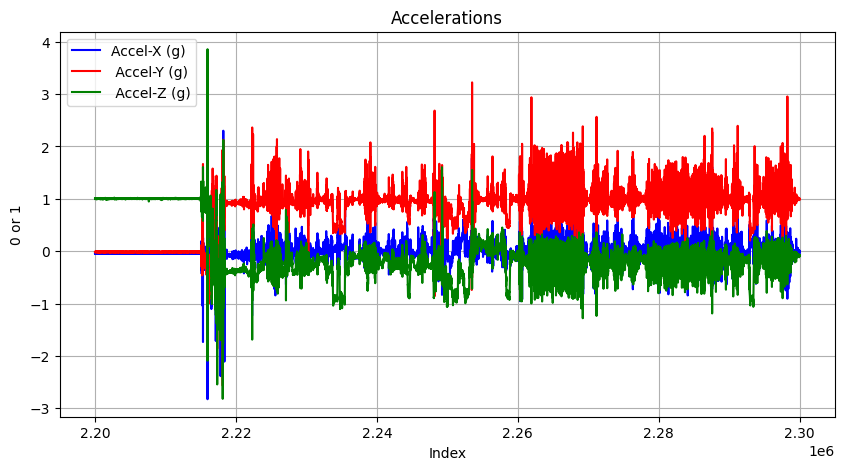

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(first['index_true'], first[first.columns[1]], label=first.columns[1], color='blue')
plt.plot(first['index_true'], first[first.columns[2]], label=first.columns[2], color='red')
plt.plot(first['index_true'], first[first.columns[3]], label=first.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

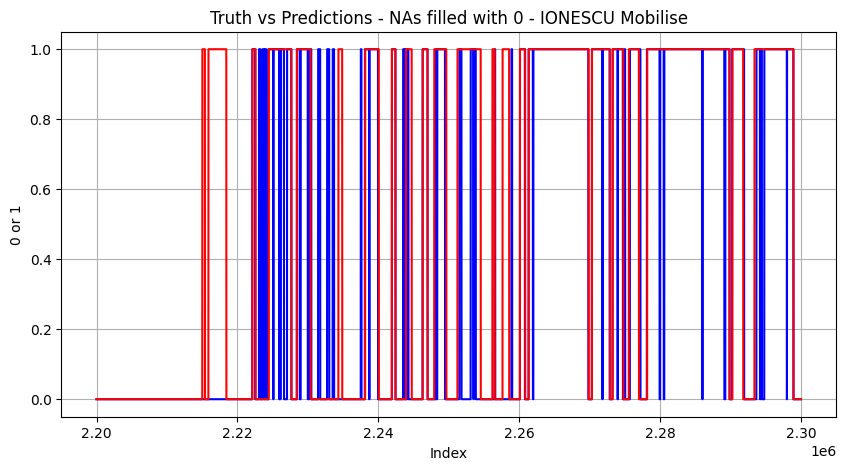

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(first['index_true'], first['actual'], label='Truth', color='blue')
plt.plot(first['index_true'], first['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

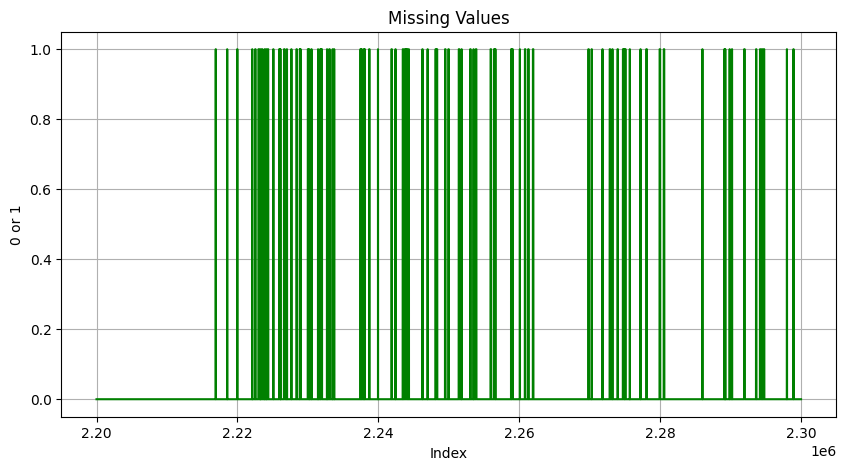

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(first['index_true'], first['is_na'], label='Missing ', color='green')
plt.title('Missing Values')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

In [105]:
results_path = '/results_mobilise_iluz/'
pred_idx_df = pd.read_csv(results_path + subject + '/gs_list.csv', skiprows=1, nrows=2)

values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,first[first['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
first['predicted']=[1 if x in values else 0 for x in first.index_true]

/tmp/ipykernel_282/632369484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first['predicted']=[1 if x in values else 0 for x in first.index_true]


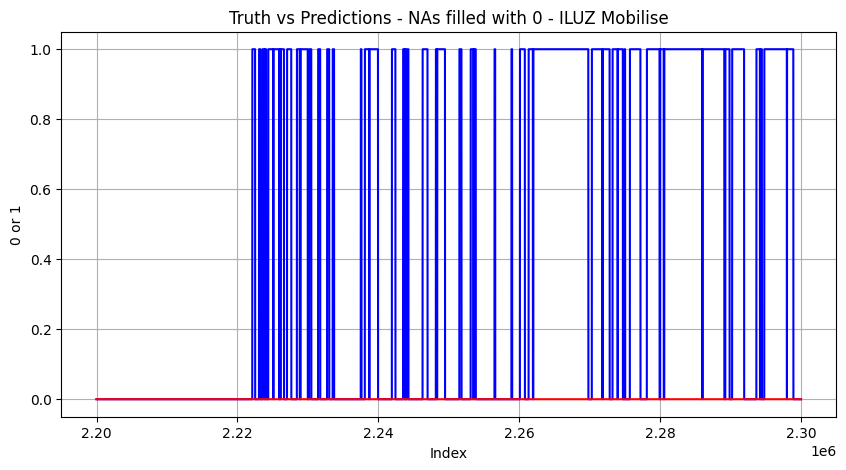

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(first['index_true'], first['actual'], label='Truth', color='blue')
plt.plot(first['index_true'], first['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - ILUZ Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

#### Range 2.3-2.36

In [41]:
second=all_data[all_data['index_true'].between(2300001, 2360000)]
second["is_na"] = second['mapped_value'].isna().astype(int)

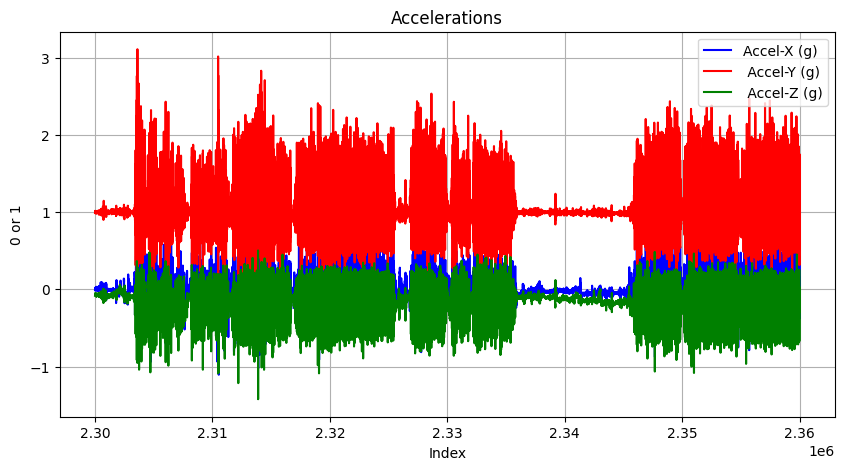

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(second['index_true'], second[second.columns[1]], label=second.columns[1], color='blue')
plt.plot(second['index_true'], second[second.columns[2]], label=second.columns[2], color='red')
plt.plot(second['index_true'], second[second.columns[3]], label=second.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

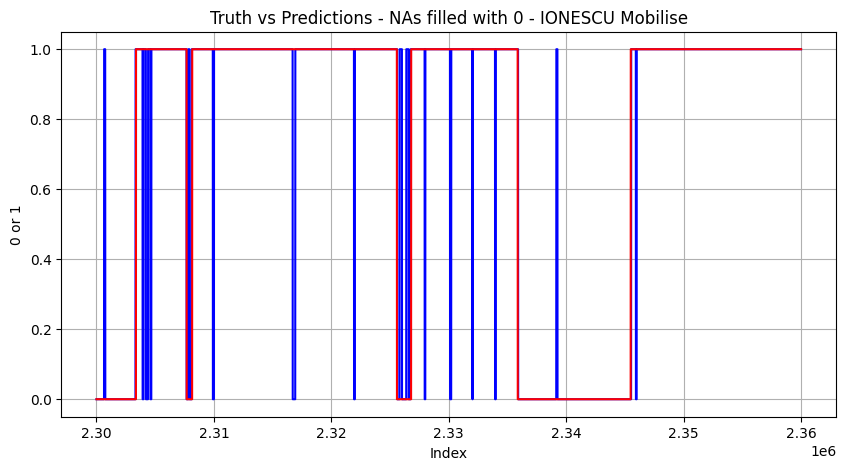

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(second['index_true'], second['actual'], label='Truth', color='blue')
plt.plot(second['index_true'], second['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

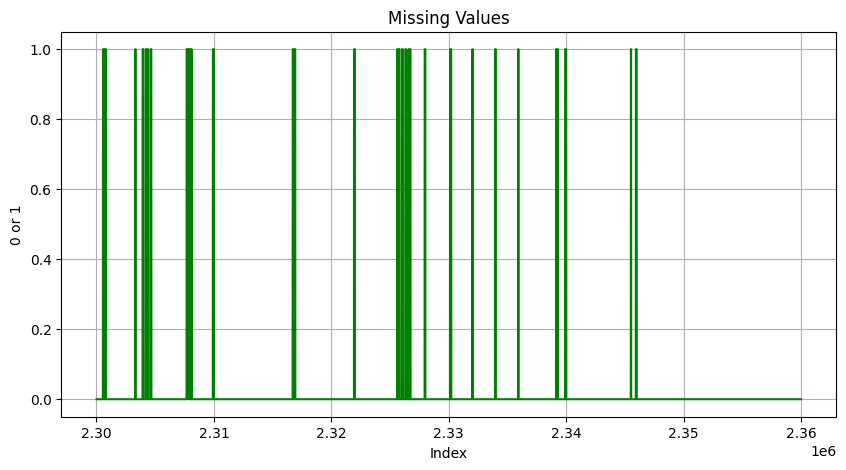

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(second['index_true'], second['is_na'], label='Missing ', color='green')
plt.title('Missing Values')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

In [82]:
second['actual'].value_counts()

actual
1    45111
0    14889
Name: count, dtype: int64

In [73]:
investigate=second[second['index_true'].between(2310001, 2318000)]

In [79]:
investigate[investigate.is_na ==1].head(50)

,timestamp,Accel-X (g),Accel-Y (g),Accel-Z (g),Gyro-X (d/s),Gyro-Y (d/s),Gyro-Z (d/s),Mag-X,Mag-Y,Mag-Z,mapped_value,actual,index_true,predicted,is_na
670152,2021-01-18 16:26:07.010,-0.181386,1.010471,-0.101004,7.07,-41.65,3.01,-20.7,-8.0,-71.3,NaN,0,2316702,1,1
670153,2021-01-18 16:26:07.019,-0.182370,1.007538,-0.113774,9.45,-39.34,2.66,-20.7,-8.0,-71.3,NaN,0,2316703,1,1
670154,2021-01-18 16:26:07.029,-0.191226,1.007538,-0.118685,10.57,-36.89,1.40,-20.7,-8.0,-71.3,NaN,0,2316704,1,1
670155,2021-01-18 16:26:07.039,-0.204017,1.003626,-0.110827,10.78,-34.86,0.84,-20.7,-8.0,-71.3,NaN,0,2316705,1,1
670156,2021-01-18 16:26:07.050,-0.220743,0.981136,-0.107880,10.64,-33.04,-0.14,-20.7,-8.0,-71.3,NaN,0,2316706,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670227,2021-01-18 16:26:07.760,-0.022974,0.974291,-0.134403,-6.51,-4.41,-1.75,-19.6,-8.2,-71.2,NaN,0,2316777,1,1
670329,2021-01-18 16:26:08.779,-0.043636,0.990914,-0.092163,2.10,-1.40,-1.05,-20.8,-7.9,-70.1,NaN,0,2316879,1,1
670330,2021-01-18 16:26:08.789,-0.041668,0.997759,-0.088234,2.24,-1.33,-0.77,-20.8,-7.9,-70.1,NaN,0,2316880,1,1
670331,2021-01-18 16:26:08.800,-0.041668,0.998737,-0.087251,1.75,-0.84,-0.49,-20.8,-7.9,-70.1,NaN,0,2316881,1,1


In [80]:
investigate[investigate.is_na ==1].tail(50)

,timestamp,Accel-X (g),Accel-Y (g),Accel-Z (g),Gyro-X (d/s),Gyro-Y (d/s),Gyro-Z (d/s),Mag-X,Mag-Y,Mag-Z,mapped_value,actual,index_true,predicted,is_na
670224,2021-01-18 16:26:07.730,-0.015102,0.974291,-0.138332,-4.13,-3.01,-2.17,-19.6,-8.2,-71.2,NaN,0,2316774,1,1
670225,2021-01-18 16:26:07.739,-0.020022,0.970380,-0.134403,-4.69,-3.64,-1.96,-19.6,-8.2,-71.2,NaN,0,2316775,1,1
670226,2021-01-18 16:26:07.750,-0.021006,0.971358,-0.134403,-5.25,-3.78,-1.82,-19.6,-8.2,-71.2,NaN,0,2316776,1,1
670227,2021-01-18 16:26:07.760,-0.022974,0.974291,-0.134403,-6.51,-4.41,-1.75,-19.6,-8.2,-71.2,NaN,0,2316777,1,1
670329,2021-01-18 16:26:08.779,-0.043636,0.990914,-0.092163,2.10,-1.40,-1.05,-20.8,-7.9,-70.1,NaN,0,2316879,1,1
670330,2021-01-18 16:26:08.789,-0.041668,0.997759,-0.088234,2.24,-1.33,-0.77,-20.8,-7.9,-70.1,NaN,0,2316880,1,1
670331,2021-01-18 16:26:08.800,-0.041668,0.998737,-0.087251,1.75,-0.84,-0.49,-20.8,-7.9,-70.1,NaN,0,2316881,1,1
670332,2021-01-18 16:26:08.809,-0.045604,0.998737,-0.085287,1.05,-0.70,-0.49,-20.8,-7.9,-70.1,NaN,0,2316882,1,1
670333,2021-01-18 16:26:08.819,-0.042652,1.001671,-0.088234,1.05,-0.56,-0.56,-20.8,-7.9,-70.1,NaN,0,2316883,1,1
670334,2021-01-18 16:26:08.829,-0.040685,1.002649,-0.088234,1.19,-0.35,-0.77,-20.8,-7.9,-70.1,NaN,0,2316884,1,1


In [67]:
second

,timestamp,Accel-X (g),Accel-Y (g),Accel-Z (g),Gyro-X (d/s),Gyro-Y (d/s),Gyro-Z (d/s),Mag-X,Mag-Y,Mag-Z,mapped_value,actual,index_true,predicted,is_na
653451,2021-01-18 16:23:20.000,-0.001388,0.987956,-0.084247,-2.73,3.22,0.35,0.5,-4.3,-79.6,standing,0,2300001,0,0
653452,2021-01-18 16:23:20.010,0.000580,0.994801,-0.079336,-2.87,3.01,0.21,0.5,-4.3,-79.6,standing,0,2300002,0,0
653453,2021-01-18 16:23:20.020,0.001564,0.998712,-0.072460,-3.36,2.52,0.07,0.5,-4.3,-79.6,standing,0,2300003,0,0
653454,2021-01-18 16:23:20.030,-0.000404,1.003601,-0.069513,-4.06,2.17,-0.14,0.5,-4.3,-79.6,standing,0,2300004,0,0
653455,2021-01-18 16:23:20.040,0.000580,1.005557,-0.058707,-4.27,1.96,0.14,0.5,-4.3,-79.6,standing,0,2300005,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713446,2021-01-18 16:33:19.950,-0.377037,1.284330,-0.177767,-65.73,-14.70,-23.24,-13.2,-5.9,-100.6,walking,1,2359996,1,0
713447,2021-01-18 16:33:19.959,-0.235352,1.069205,-0.288769,-6.86,-10.36,-17.71,-13.2,-5.9,-100.6,walking,1,2359997,1,0
713448,2021-01-18 16:33:19.969,-0.108425,1.046714,-0.280910,23.59,-14.07,-6.16,-13.2,-5.9,-100.6,walking,1,2359998,1,0
713449,2021-01-18 16:33:19.979,0.037196,1.023246,-0.214113,20.72,-16.73,5.74,-13.2,-5.9,-100.6,walking,1,2359999,1,0


In [109]:
results_path = '/mnt/Jake/results_mobilise_iluz/'
pred_idx_df = pd.read_csv(results_path + subject + '/gs_list.csv', skiprows=1, nrows=2)

values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,second[second['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
second['predicted']=[1 if x in values else 0 for x in second.index_true]

/tmp/ipykernel_282/746344968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second['predicted']=[1 if x in values else 0 for x in second.index_true]


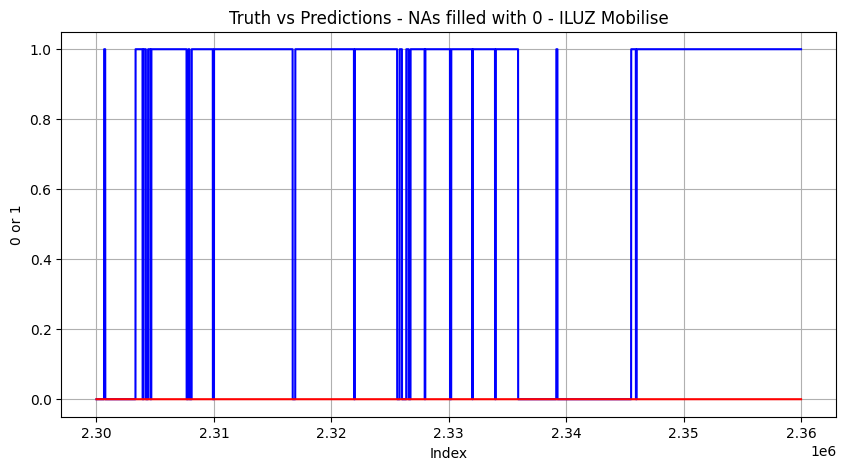

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(second['index_true'], second['actual'], label='Truth', color='blue')
plt.plot(second['index_true'], second['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - ILUZ Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

#### Range 2.361-2.42

In [91]:
third=all_data[all_data['index_true'].between(2360001, 2420000)]
third["is_na"] = third['mapped_value'].isna().astype(int)

/tmp/ipykernel_282/3191064980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third["is_na"] = third['mapped_value'].isna().astype(int)


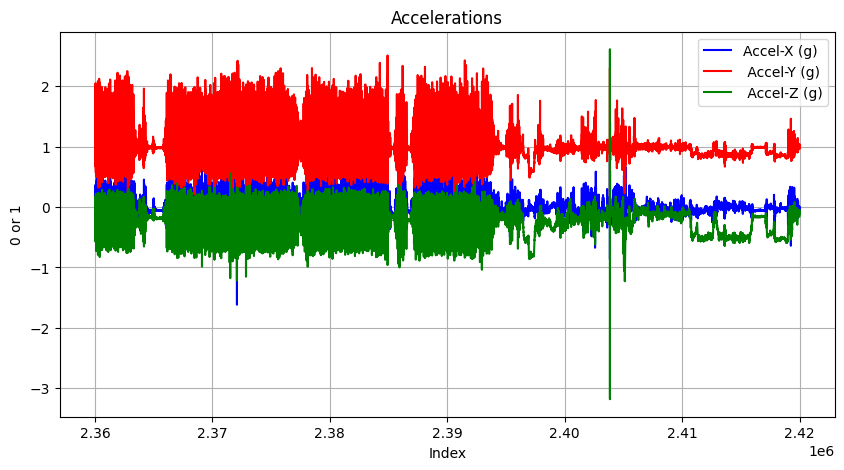

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(third['index_true'], third[third.columns[1]], label=third.columns[1], color='blue')
plt.plot(third['index_true'], third[third.columns[2]], label=third.columns[2], color='red')
plt.plot(third['index_true'], third[third.columns[3]], label=third.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

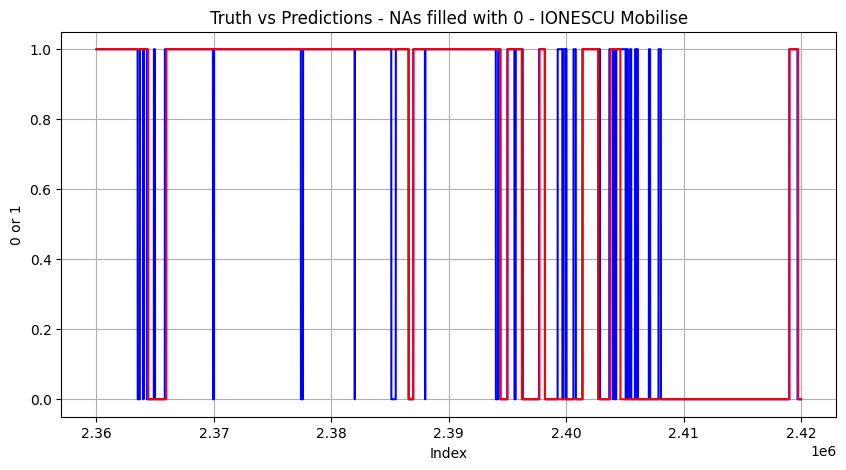

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(third['index_true'], third['actual'], label='Truth', color='blue')
plt.plot(third['index_true'], third['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

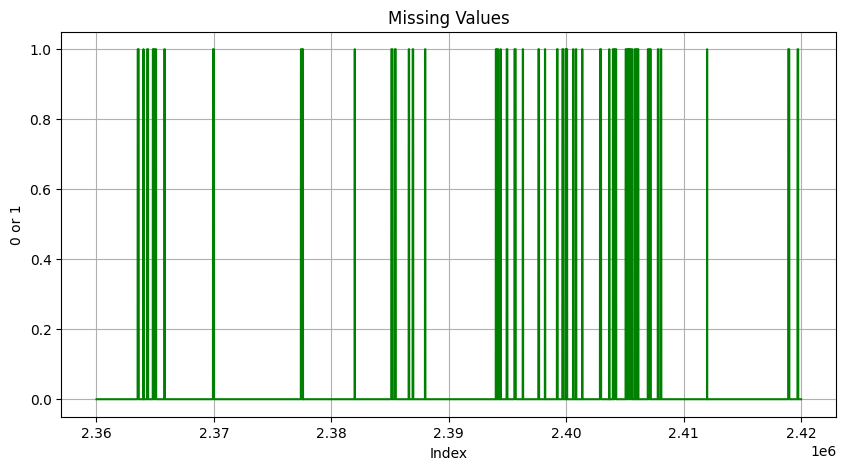

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(third['index_true'], third['is_na'], label='Missing ', color='green')
plt.title('Missing Values')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

In [115]:
results_path = '/mnt/Jake/results_mobilise_iluz/'
pred_idx_df = pd.read_csv(results_path + subject + '/gs_list.csv', skiprows=1, nrows=2)

values=np.array([])
for x in range(len(pred_idx_df)):
   values= np.append(values,third[third['index_true'].between(pred_idx_df.iloc[x,0], pred_idx_df.iloc[x,1])].index_true.values)
third['predicted']=[1 if x in values else 0 for x in third.index_true]

/tmp/ipykernel_282/1157163594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third['predicted']=[1 if x in values else 0 for x in third.index_true]


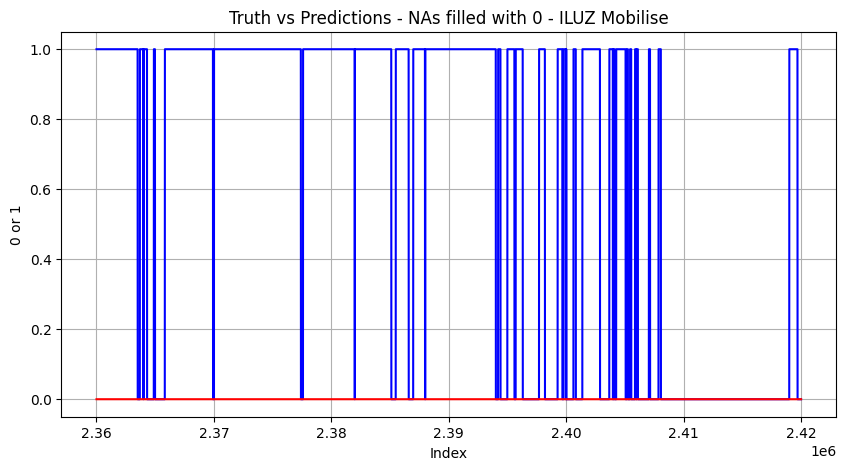

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(third['index_true'], third['actual'], label='Truth', color='blue')
plt.plot(third['index_true'], third['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - ILUZ Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

## Narrower- Walking Bout specific

#### Range 2.3-2.335

In [14]:
fourth=all_data[all_data['index_true'].between(2300001, 2340000)]
fourth["is_na"] = fourth['mapped_value'].isna().astype(int)

/tmp/ipykernel_329/1394469796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth["is_na"] = fourth['mapped_value'].isna().astype(int)


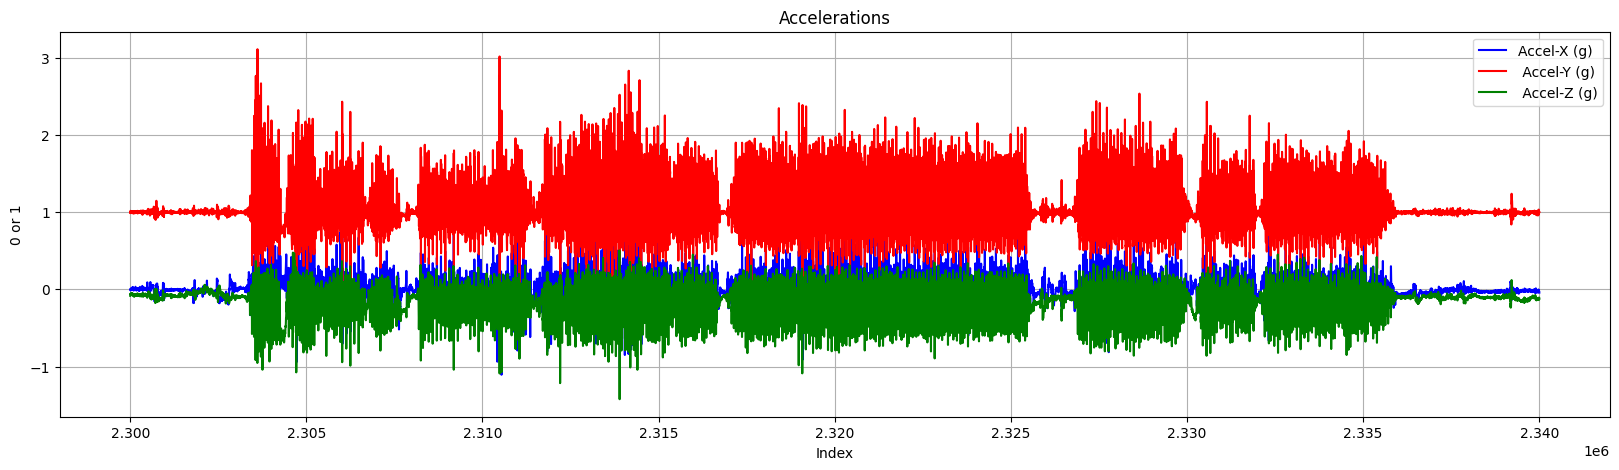

In [61]:
plt.figure(figsize=(20, 5))
plt.plot(fourth['index_true'], fourth[fourth.columns[1]], label=fourth.columns[1], color='blue')
plt.plot(fourth['index_true'], fourth[fourth.columns[2]], label=fourth.columns[2], color='red')
plt.plot(fourth['index_true'], fourth[fourth.columns[3]], label=fourth.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

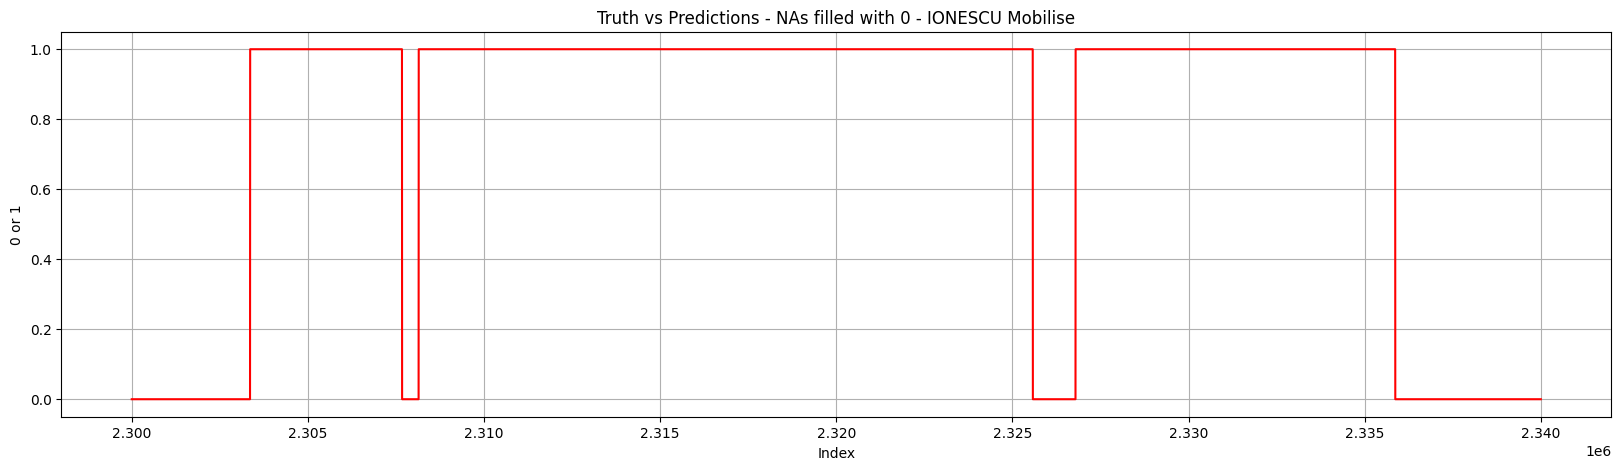

In [63]:
plt.figure(figsize=(20, 5))
plt.plot(fourth['index_true'], fourth['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

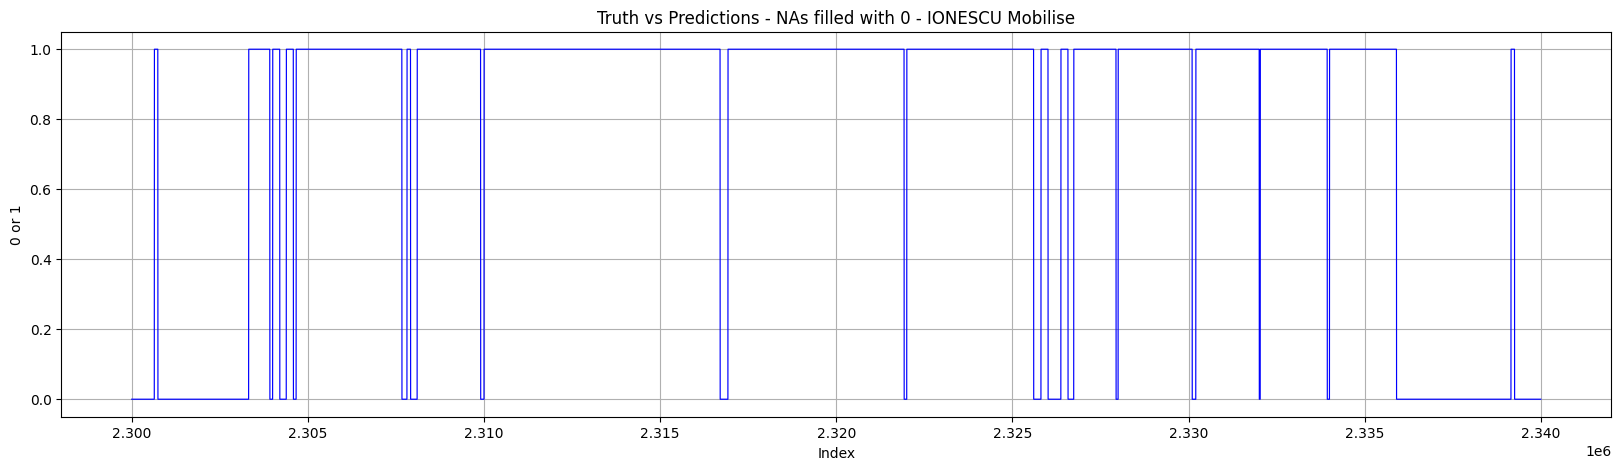

In [66]:
plt.figure(figsize=(20, 5))
plt.plot(fourth['index_true'], fourth['actual'], label='Truth', color='blue',linewidth=0.85)
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

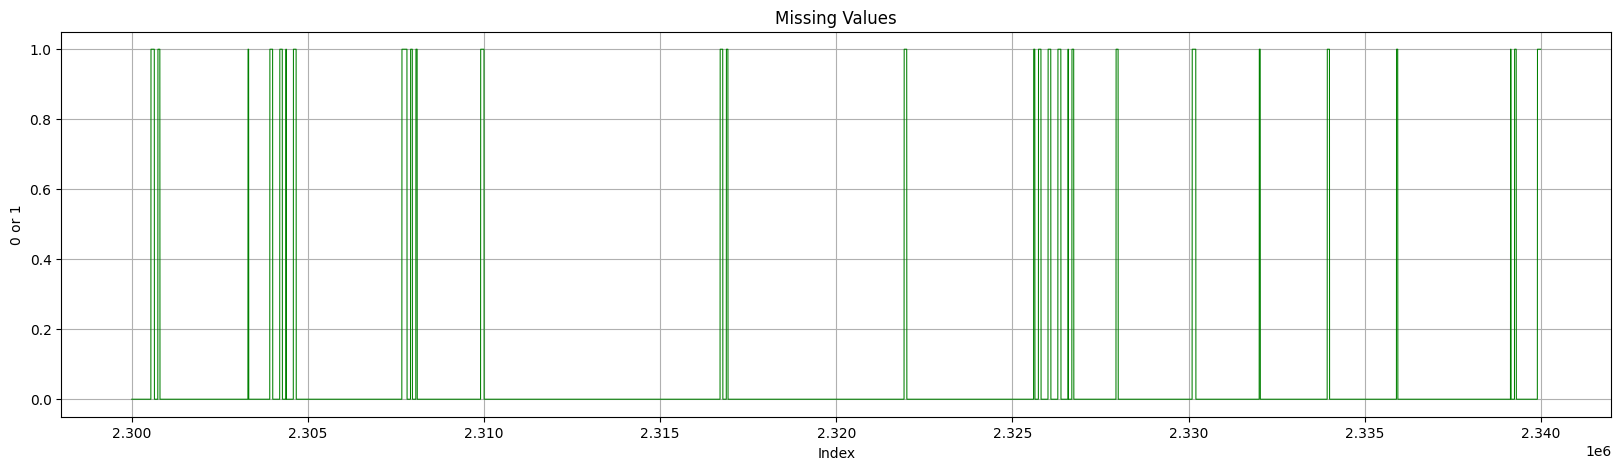

In [68]:
plt.figure(figsize=(20, 5))
plt.plot(fourth['index_true'], fourth['is_na'], label='Missing ', color='green',linewidth=0.75)
plt.title('Missing Values')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

#### Range 2.345-2.395

In [48]:
fifth=all_data[all_data['index_true'].between(2343501, 2398500)]
fifth["is_na"] = fifth['mapped_value'].isna().astype(int)

/tmp/ipykernel_329/3854340863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifth["is_na"] = fifth['mapped_value'].isna().astype(int)


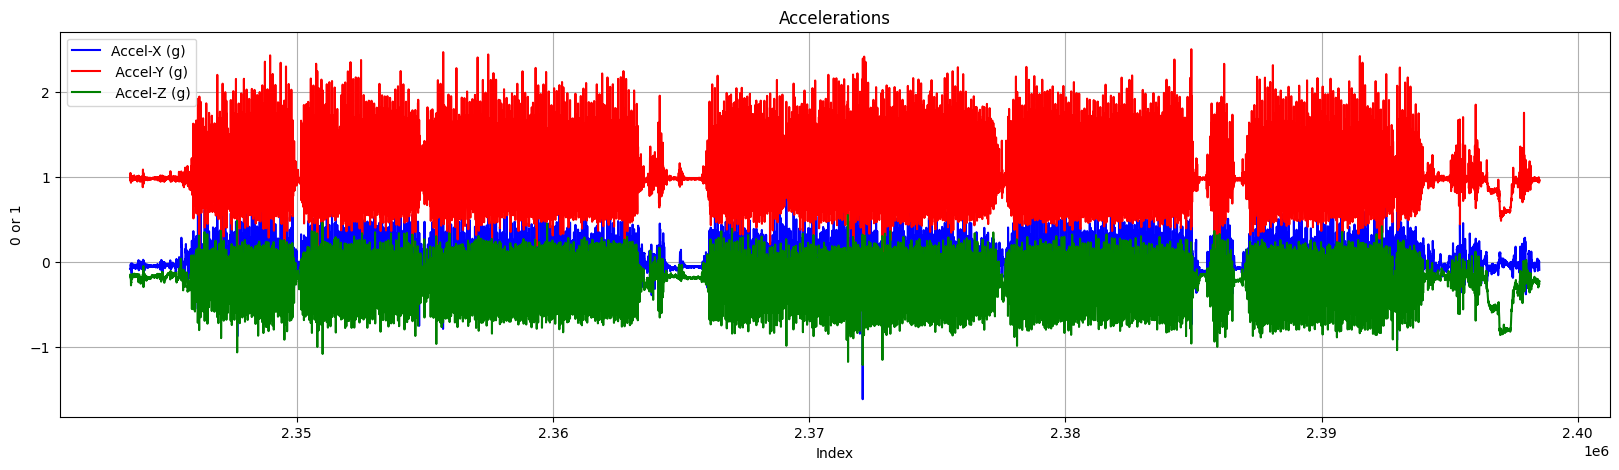

In [59]:
plt.figure(figsize=(20, 5))
plt.plot(fifth['index_true'], fifth[fifth.columns[1]], label=fifth.columns[1], color='blue')
plt.plot(fifth['index_true'], fifth[fifth.columns[2]], label=fifth.columns[2], color='red')
plt.plot(fifth['index_true'], fifth[fifth.columns[3]], label=fifth.columns[3], color='green')
plt.title('Accelerations')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.legend()
plt.show()

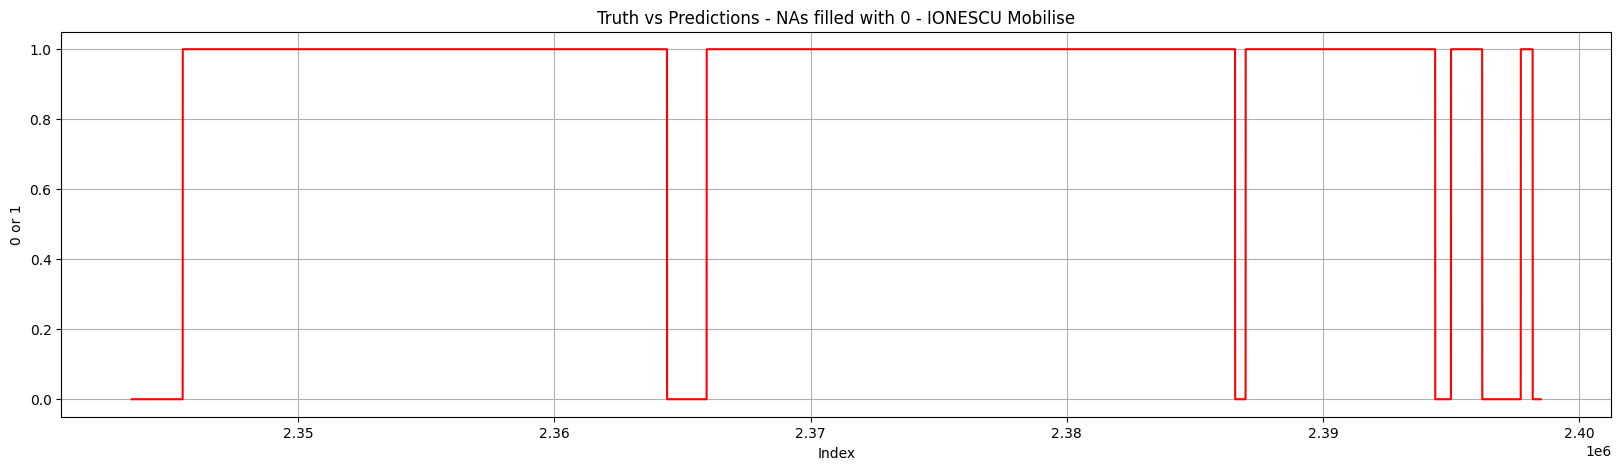

In [56]:
plt.figure(figsize=(20, 5))
plt.plot(fifth['index_true'], fifth['predicted'], label='Predictions', color='red')
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

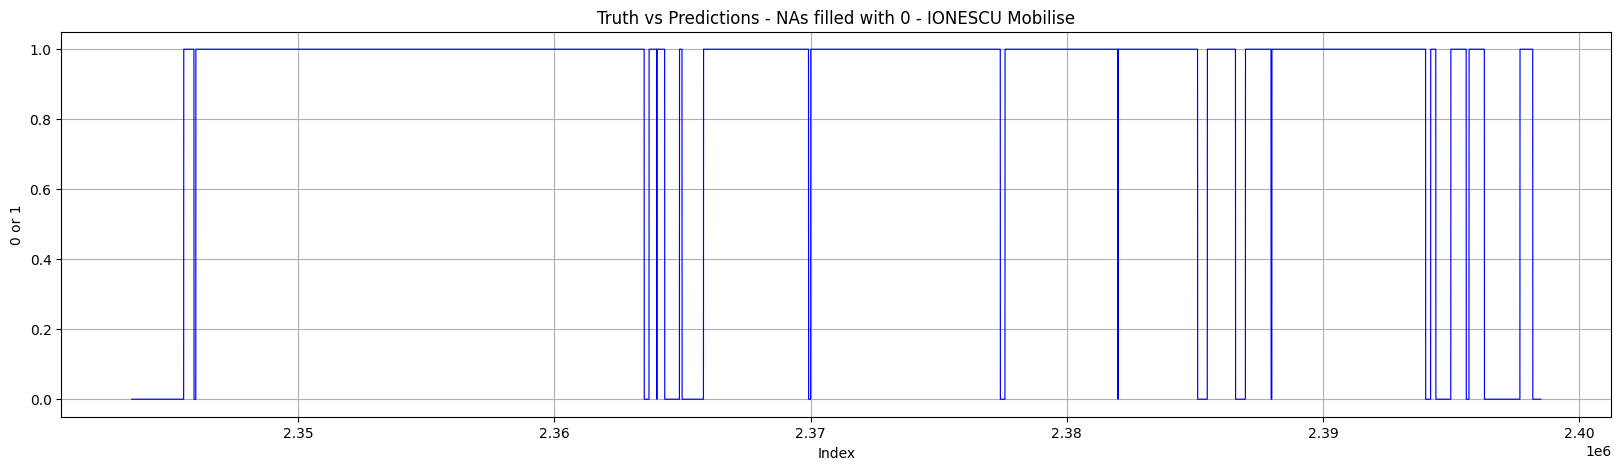

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(fifth['index_true'], fifth['actual'], label='Truth', color='blue',linewidth=0.85)
plt.title('Truth vs Predictions - NAs filled with 0 - IONESCU Mobilise')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()

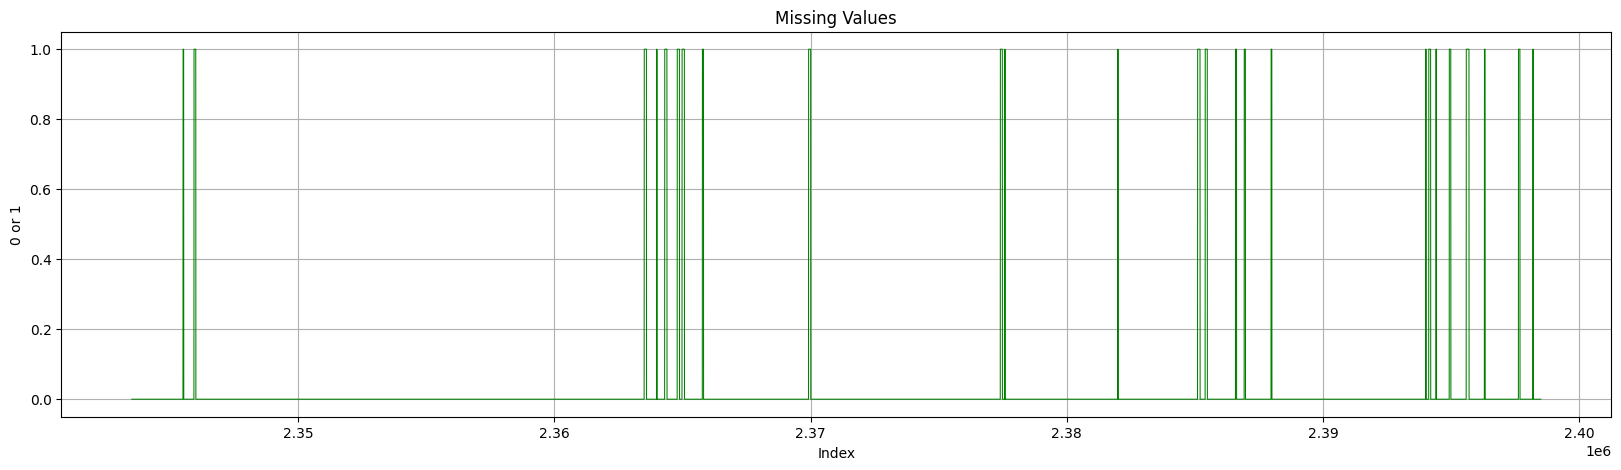

In [70]:
plt.figure(figsize=(20, 5))
plt.plot(fifth['index_true'], fifth['is_na'], label='Missing ', color='green',linewidth=0.75)
plt.title('Missing Values')
plt.xlabel('Index')
plt.ylabel('0 or 1')
plt.grid(True)
plt.show()